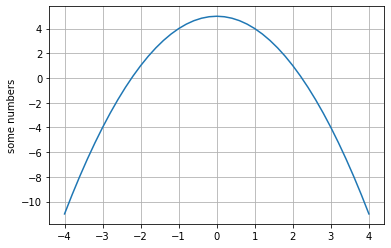

In [47]:
import matplotlib.pyplot as plt
import random

X = range(-20,21)
X = [x/5 for x in X]
Y = [5 - x**2 for x in X]


plt.plot(X, Y)
plt.ylabel('some numbers')
plt.grid()
plt.show()

In [2]:
population = [10 * random.random() - 5  for i in range(10)]

In [3]:
population

[1.3662677572103012,
 -4.7047805877211,
 4.194978482782421,
 1.5609667500743427,
 -0.8052336726200124,
 2.0151938836481778,
 2.9513095977008845,
 1.7963088038408204,
 -2.282091486590655,
 1.3938970928464878]

In [5]:
def fitness(x):
    return 5 - x**2/10

In [6]:
values = [fitness(a) for a in population]

In [7]:
values

[4.813331241560753,
 2.7865039621402703,
 3.24021555289925,
 4.756338280516235,
 4.935159873247889,
 4.593899361130697,
 4.128977165851865,
 4.677327468124396,
 4.479205844683046,
 4.805705089455411]

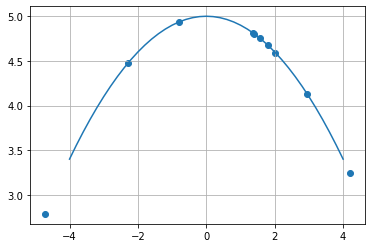

In [8]:
plt.plot(X, Y)
plt.scatter(population, values)
plt.grid()
plt.show()

In [9]:
min(values)

2.7865039621402703

In [10]:
min_v = min(values)
fitness_values  = [v- min_v for v in values]

sum_v = sum(fitness_values)
fitness_values  = [v/sum_v  for v in fitness_values]

In [11]:
fitness_values

[0.13202689504454226,
 0.0,
 0.029554631113291277,
 0.12831439138796338,
 0.13996277400793208,
 0.11773317098570237,
 0.08744828460036261,
 0.12316765178121017,
 0.11026207119734092,
 0.13153012988165494]

In [12]:
sum(fitness_values)

0.9999999999999999

In [13]:
import numpy as np
np.random.choice(['a', 'b', 'c', 'd', 'e'], 3, p=[0.1, 0, 0.3, 0.6, 0])

array(['d', 'd', 'd'], dtype='<U1')

In [14]:
np.random.choice(population, 3, p=fitness_values)

array([-0.80523367, -0.80523367,  1.36626776])

In [15]:
N = len(population)
N

10

In [16]:
offspings = list(np.random.choice(population, N- 1, p=fitness_values))

In [17]:
best = population[fitness_values.index(max(fitness_values))]
best

-0.8052336726200124

In [18]:
new_population = offspings + [best]
new_population

[1.5609667500743427,
 2.0151938836481778,
 2.0151938836481778,
 2.9513095977008845,
 1.3938970928464878,
 2.9513095977008845,
 -0.8052336726200124,
 4.194978482782421,
 1.5609667500743427,
 -0.8052336726200124]

In [19]:
new_values = [fitness(a) for a in new_population]

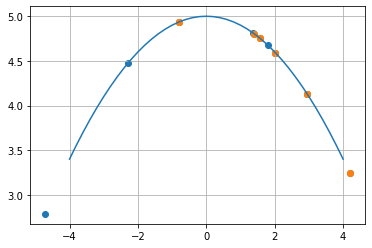

In [20]:
plt.plot(X, Y)
plt.scatter(population, values)
plt.scatter(new_population, new_values)
plt.grid()
plt.show()

In [21]:
eps = 0.2 * random.random() - 0.1

In [22]:
r = random.random()
if r < 0.05:
    print('Mutation')
else: 
    print('No Mutation')

No Mutation


# GA

In [63]:
def fitness(x):
    return 5 - (x - 1)**2

X = range(-20,21)
X = [x/5 for x in X]
Y = [fitness(x) for x in X]



# initial population
N = 10
population = [10 * random.random() - 5  for i in range(N)]
values = [fitness(a) for a in population]

# Evaluation: Compute fitness values
def getFitnessValue(population):
    values = [fitness(a) for a in population]
    
    min_v = min(values)
    if min_v < 0:
        fitness_values  = [v- min_v for v in values]
    else:
        fitness_values = values

    sum_v = sum(fitness_values)
    fitness_values  = [v/sum_v  for v in fitness_values]
    return fitness_values


# Mutation
def mutate(x):
    eps = 0.6 * random.random() - 0.3
    r = random.random()
    if r < 0.05:
        x = x + eps
    return x

# Reproduction
offspings = list(np.random.choice(population, N- 1, p=fitness_values))
offspings = [mutate(o) for o in offspings]
best = population[fitness_values.index(max(fitness_values))]

new_population = offspings + [best]
new_values = [fitness(a) for a in new_population]

new_fitness_values = getFitnessValue(new_population)





In [66]:
N = 10
population = [10 * random.random() - 5  for i in range(N)]
values = [fitness(a) for a in population]
fitness_values = getFitnessValue(population)
best = population[fitness_values.index(max(fitness_values))]

    
G = 100
populations = {}
for i in range(G):
    populations[i] = (population, values, best)
    offspings = list(np.random.choice(population, N-1, p=fitness_values))
    offspings = [mutate(o) for o in offspings]
    best = population[fitness_values.index(max(fitness_values))]

    population = offspings + [best]
    values = [fitness(a) for a in population]
    fitness_values = getFitnessValue(population)

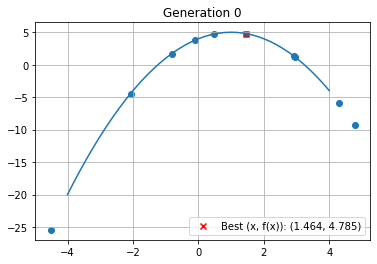

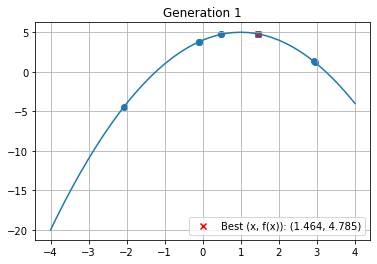

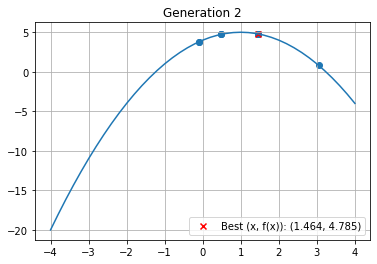

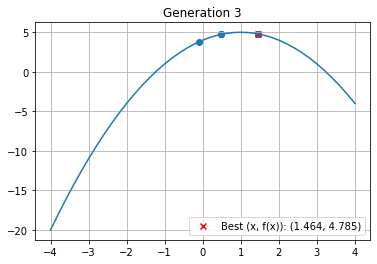

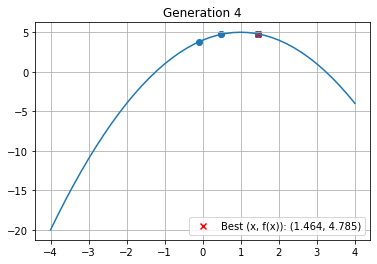

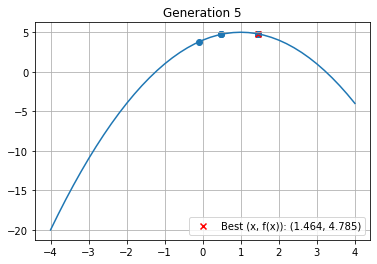

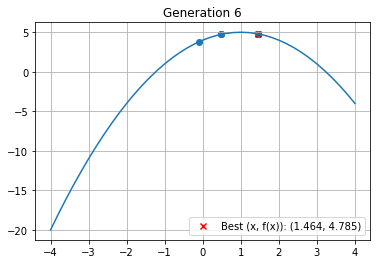

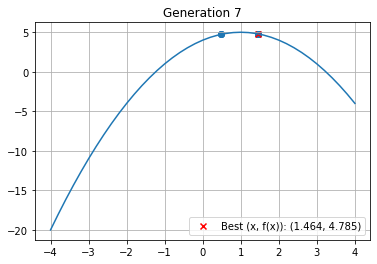

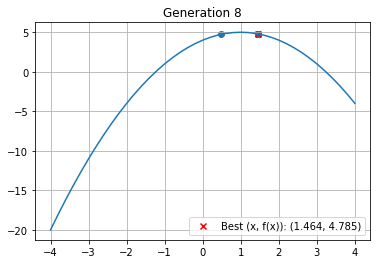

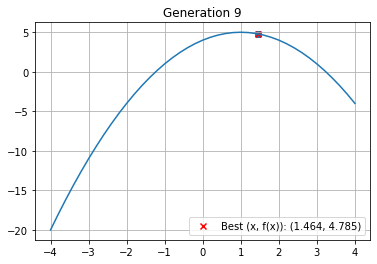

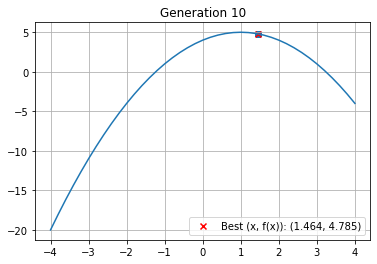

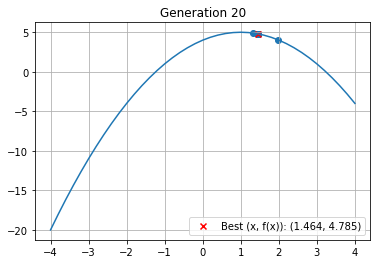

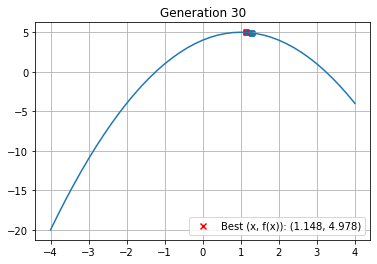

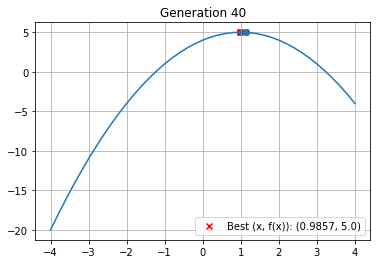

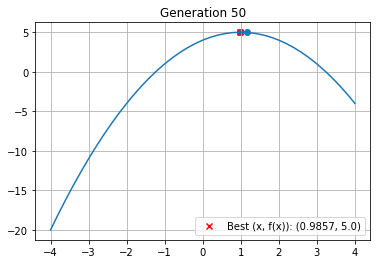

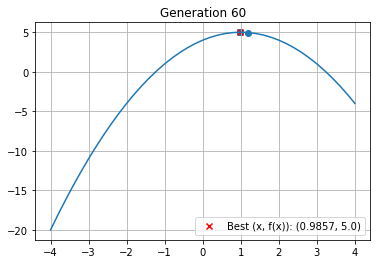

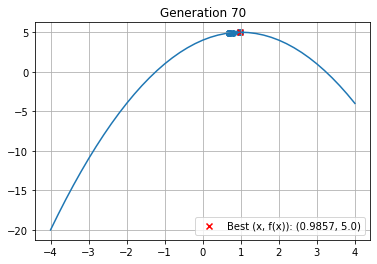

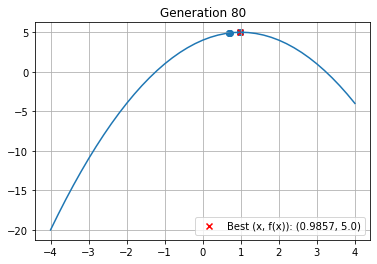

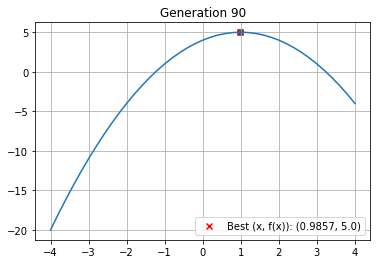

In [67]:
for k, v in populations.items():
    if k< 10 or k%10 ==0:
        population, values, best = v
        fitness_best = fitness(best)
        
        plt.plot(X, Y)
        plt.scatter(population, values)
        plt.scatter(best, fitness(best), 
                    c='r', marker='x',
                   label = f'Best (x, f(x)): ({best:.4}, {fitness_best:.4})')
        plt.title(f'Generation {k}')
        plt.grid()
        plt.legend()
        plt.show()